# Employee Sentiment Analysis and Flight Risk Prediction Using Machine Learning - An End-to-End Analysis

## We start by checking that the CSV file is intact in your computer

In [6]:

# Check that the csv file exists on your system

import os

file_path = r"C:\Users\lenovo\Documents\test.csv" 
print("File exists:", os.path.exists(file_path))

File exists: True


# STEP 1: SET UP THE ENVIRONMENT

  ## INSTALL THE REQUIRED LIBRARIES

     - We will use pandas, numpy, matplotlib, seaborn, scikit-learn, torch, and nlt

## Step 2: Load the Dataset
In this step, we load the dataset into Jupyter Notebook using the Pandas library. 
We then display basic information about the dataset, including column names, data types, and any missing values. 
Additionally, we print the first few rows to get an overview of the data.


In [7]:
# STEP 2: LOAD THE DATASET

import pandas as pd

# This is to Load data set into Jupyter and show its details 

df = pd.read_csv(r"C:\Users\lenovo\Documents\test.csv")

# View basic information
print(df.info())  # Shows column names, data types, and missing values
print(df.head())  # Displays the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB
None
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh..

## Step 3: Text Preprocessing

### Why Preprocess?
Text data is often noisy, and to analyze sentiments accurately, we need to clean it.

### Preprocessing Steps:
- **Lowercasing:** Convert all text to lowercase for uniformity.
- **Removing Punctuation:** Punctuation doesn’t carry sentiment and can be safely removed.
- **Removing Stop Words:** Common words like "the" and "and" do not add value to sentiment analysis.
- **Tokenization:** Break sentences into individual words to facilitate analysis.


### Checking for Missing Values

To ensure data integrity, we check for missing values in each column.


In [8]:
# Check for missing values in each column

print(df.isnull().sum())  # This is to check and count missing values in each column

Subject    0
body       0
date       0
from       0
dtype: int64


### Listing All Column Names

To get an overview of the dataset structure, we list all the column names.


In [9]:
# List all column names

print(df.columns)  # Displays the names of all columns in the dataset


Index(['Subject', 'body', 'date', 'from'], dtype='object')


### Displaying the First Few Rows

To get a quick glimpse of the data, we display the first few rows and basic information about the dataset.


In [10]:
# Display the first few rows

print(df.head())  # Shows the first 5 rows of the dataset

print(df.info())  # Provides information about the columns, data types, and non-null counts

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Colum

### Importing NLTK and Downloading the Tokenizer

To perform tokenization, we use the Natural Language Toolkit (NLTK) library. 
The 'punkt' tokenizer is essential for breaking text into words.


In [11]:
# Import nltk and download the tokenizer 'punkt'

import nltk
nltk.download('punkt')  # This downloads the necessary tokenizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Downloading Stopwords using NLTK

Stopwords are common words (like "the", "is", "in") that are often removed from text analysis as they do not 
contribute to the sentiment or meaning.


In [12]:
# Download 'stopwords'

import nltk
nltk.download('punkt')
nltk.download('stopwords')  # Downloads common stop words for text processing


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Setting NLTK Data Path

To ensure that NLTK can access the downloaded data, we specify the path where NLTK data is stored.


In [13]:
import nltk
nltk.data.path.append("C:\\Users\\lenovo\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data")


# STEP 4: TASK BREAKDOWN

    ## Task 1: Sentiment Labelling

# Option 1: Using VADER (Rule-based approach)
## Suitable for analyzing social media text, short messages, and reviews.
        -	Pros: Fast, works well for short, informal text.
        -	Cons: Less accurate for complex sentences


# Initialize VADER Sentiment Analyzer

To use VADER (Valence Aware Dictionary and sEntiment Reasoner) for sentiment analysis, we need to download the lexicon and initialize the sentiment intensity analyzer.



In [14]:
# Download  and initialize 'vader_lexicon' as Sentiment Analyser

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Display Available Columns in DataFrame

To list all available columns in the DataFrame, use the following code:

In [15]:
print(df.columns)  # Lists all available columns


Index(['Subject', 'body', 'date', 'from'], dtype='object')


# Set Sentiment Scores, Apply Sentiment Labelling, and Display Results

The following function assigns a sentiment label based on the compound score returned by VADER.



In [16]:
# Set sentiment scores, Apply Sentiment Labelling and Display results

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labeling
df['sentiment'] = df['body'].apply(get_sentiment)

# Display results
print(df[['body', 'sentiment']].head())

# The compound score is a normalized value between -1 (negative) and +1 (positive).

                                                body sentiment
0  EnronOptions Announcement\n\n\nWe have updated...  Positive
1  Marc,\n\nUnfortunately, today is not going to ...  Positive
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   Neutral
3  we were thinking papasitos (we can meet somewh...   Neutral
4  Since you never gave me the $20 for the last t...  Positive


# Option 2: Using TextBlob (Lexicon-based Approach)

### Pros:
- Simple and intuitive.

### Cons:
- Limited to basic polarity analysis.

In [107]:


# Install another Sentiment Analyser 'Textblob' for comparison

!pip install textblob



In [17]:
# Import TextBlob

from textblob import TextBlob


# Sentiment Analysis Using TextBlob

The following function uses TextBlob to determine the sentiment of a given text.


In [19]:
def get_sentiment_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labeling
df['sentiment_textblob'] = df['body'].apply(get_sentiment_textblob)

print(df[['body', 'sentiment_textblob']].head())


                                                body sentiment_textblob
0  EnronOptions Announcement\n\n\nWe have updated...           Positive
1  Marc,\n\nUnfortunately, today is not going to ...           Negative
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...            Neutral
3  we were thinking papasitos (we can meet somewh...           Negative
4  Since you never gave me the $20 for the last t...           Negative


# Comparing VADER and TextBlob Sentiment Analysis

### Why Compare?
Both VADER and TextBlob can yield slightly different sentiment results, so it is useful to compare their outputs to understand how often they agree or differ.

---

## Selecting the Best Approach

### When to Use:
- **VADER:** 
  - Best for short, informal text (e.g., social media comments).
- **TextBlob:** 
  - More reliable for longer, formal, and grammatically correct messages.

### Our Approach:
- Since our dataset contains both short, informal comments and longer, formal texts, we will use both sentiment analysis methods simultaneously.
- The columns will be labeled as follows:
  - **VADER sentiment:** Stored in the `sentiment` column.
  - **TextBlob sentiment:** Stored in the `sentiment_textblob` column.

### Rationale:
- This combined approach ensures a more balanced and accurate sentiment analysis, taking into account the diverse nature of the text data.


In [20]:
#  Since both VADER and TextBlob can give slightly different results, it’s good to compare:

# Compare the two Sentiment Labels

comparison = df[['sentiment', 'sentiment_textblob']].value_counts()
print(comparison)


sentiment  sentiment_textblob
Positive   Positive              1083
Neutral    Neutral                375
Positive   Neutral                295
           Negative               150
Neutral    Positive                70
           Negative                66
Negative   Positive                65
           Negative                54
           Neutral                 33
Name: count, dtype: int64


# Save the Sentiment Labels to a CSV File

After assigning sentiment labels, it’s essential to save the labeled data for future analysis or reporting.


In [21]:
# Save the Sentiment Labels

df.to_csv(r"C:\Users\lenovo\Documents\labeled_test.csv", index=False)
print("Sentiment labeling complete and saved.")

# This will create a new CSV file containing the cleaned and labeled messages.


Sentiment labeling complete and saved.


# Task 2: Exploratory Data Analysis (EDA)

## Purpose:
To analyze the distribution and trends of the sentiment labels obtained from the sentiment analysis.

### Key Steps:
1. **Data Distribution:** Examine the frequency of each sentiment label to understand the overall sentiment trend.
2. **Visualization:** Use plots (e.g., bar charts, pie charts) to visualize the sentiment distribution.
3. **Trend Analysis:** Analyze patterns in the sentiment over time or across different categories (if applicable).

EDA will help us gain insights into how sentiments vary within the dataset, enabling us to draw meaningful conclusions.


In [22]:
# Load dataset and Check for missing values and duplicates

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\lenovo\Documents\labeled_test.csv")

# Display basic info and preview
print(df.info())  # Check data types and missing values
print(df.head())  # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject             2191 non-null   object
 1   body                2191 non-null   object
 2   date                2191 non-null   object
 3   from                2191 non-null   object
 4   sentiment           2191 non-null   object
 5   sentiment_textblob  2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB
None
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunat

# Ensure Correct Date and Time Format

When performing EDA, it’s important to ensure that the date and time columns are in the correct format for analysis.


In [24]:
# Ensure that Date and Time are in the right format

# # Convert timestamp to datetime format

df['timestamp'] = pd.to_datetime(df['date'])


# Check Column Data Types for Discrepancies

It’s essential to inspect the data types of each column to ensure consistency, especially after data transformations.


In [25]:
# Display column data types to check for discrepancies

print(df.dtypes)  # Display column data types


Subject                       object
body                          object
date                          object
from                          object
sentiment                     object
sentiment_textblob            object
timestamp             datetime64[ns]
dtype: object


# Check for Missing Values and Preview Timestamp Column

To ensure the timestamp data is correctly formatted and complete, we check for missing values and preview the first few entries.


In [26]:

print(df['timestamp'].isnull().sum())  # Count missing values
print(df['timestamp'].head(10))  # Preview values


0
0   2010-05-10
1   2010-07-29
2   2011-07-25
3   2010-03-25
4   2011-05-21
5   2011-10-23
6   2010-04-05
7   2010-04-21
8   2010-02-07
9   2010-02-06
Name: timestamp, dtype: datetime64[ns]


# Extract Date-Related Features for Analysis

To perform time-based analysis, we extract key date features from the timestamp.


In [27]:
# Extract year, month, day, and weekday from the timestamp
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.day_name()

# Verify the transformation by previewing the first few rows
print(df[['timestamp', 'year', 'month', 'day', 'weekday']].head())

   timestamp  year  month  day   weekday
0 2010-05-10  2010      5   10    Monday
1 2010-07-29  2010      7   29  Thursday
2 2011-07-25  2011      7   25    Monday
3 2010-03-25  2010      3   25  Thursday
4 2011-05-21  2011      5   21  Saturday


# Sentiment Distribution Analysis

To understand the proportion of Positive, Negative, and Neutral messages, we analyze and visualize the sentiment distribution.

### Libraries Used:
- **Matplotlib:** For plotting graphs.
- **Seaborn:** For enhanced visualization aesthetics.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11936\2422986462.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


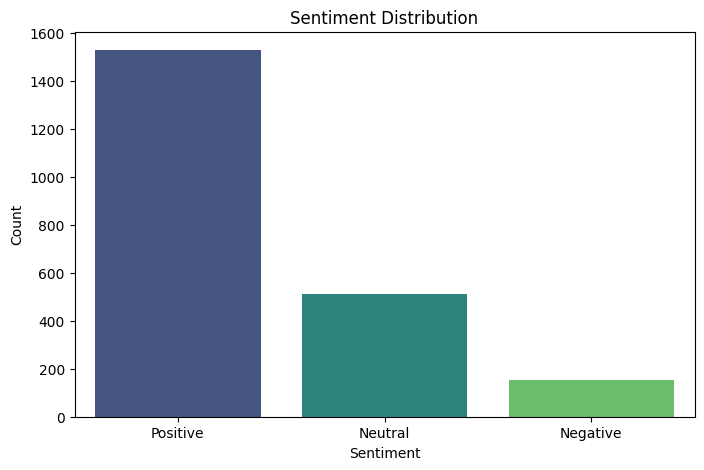

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Save the plot as a PNG file
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Sentiment_Distribution.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


# Sentiment Trends Over Time

To analyze how sentiment evolves over time, we visualize the sentiment distribution by month.

### Steps:
1. **Grouping Data:** We group the data by year, month, and sentiment.
2. **Plotting Trends:** A stacked bar chart visualizes how sentiments change each month.


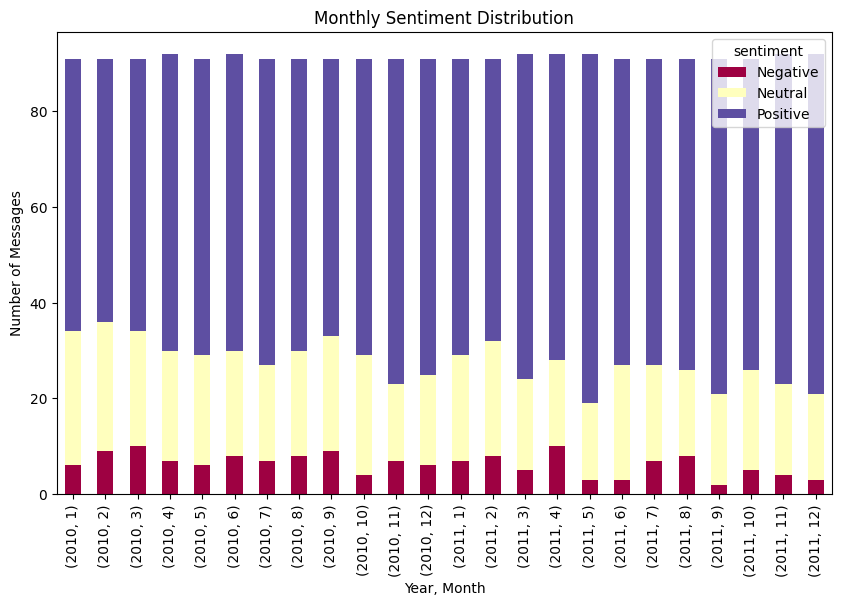

<Figure size 640x480 with 0 Axes>

In [29]:
# Group by month and sentiment to analyze trends
monthly_sentiment = df.groupby(['year', 'month', 'sentiment']).size().unstack()

# Plot the monthly sentiment trend as a stacked bar chart
monthly_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Spectral')
plt.title("Monthly Sentiment Distribution")
plt.xlabel("Year, Month")
plt.ylabel("Number of Messages")
plt.show()

# Save the plot as a PNG file
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Monthly_Sentiment_Distribution_Trend.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Message Length Analysis

This analysis aims to investigate if there is any correlation between message length and sentiment.

### Steps:
1. **Message Length Calculation:** Calculate the length of each message (i.e., the number of characters).
2. **Boxplot Visualization:** Create a boxplot to compare the distribution of message lengths across different sentiment categories.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11936\159483462.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='body_length', data=df, palette="pastel")


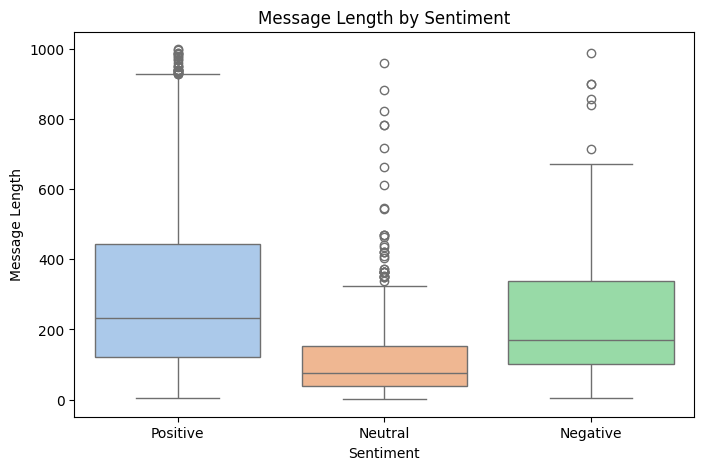

<Figure size 640x480 with 0 Axes>

In [30]:
# Calculate message length
df['body_length'] = df['body'].apply(len)

# Create a boxplot of message length by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='body_length', data=df, palette="pastel")
plt.title("Message Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Message Length")
plt.show()

# Save the plot as a PNG file
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Message_Length_by_Sentiment_Boxplot.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Install WordCloud for Text Visualization

To generate word clouds from the text data, we need to install the `wordcloud` library.


In [31]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


# Most Frequent Words per Sentiment

This analysis uses word clouds to visualize the most common words in each sentiment category (Positive, Negative, and Neutral).

### Steps:
1. **Generate Word Clouds:** For each sentiment category, a word cloud is created from the text in the `body` column.
2. **Display Word Clouds:** Word clouds are visualized to identify frequently occurring words associated with each sentiment.
3. **Save the Word Cloud Image:**

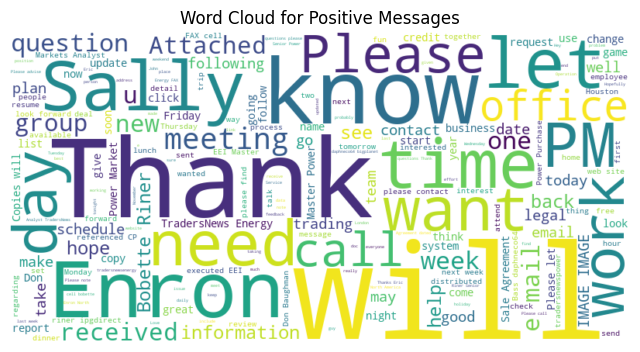

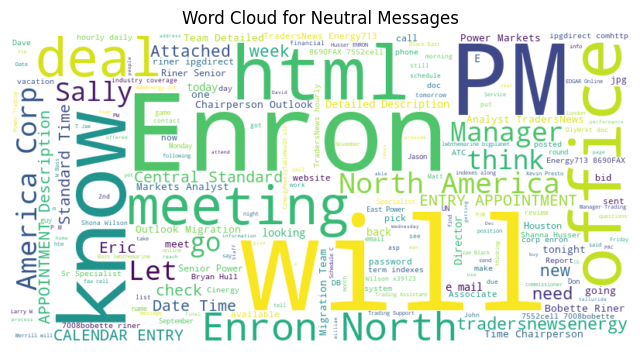

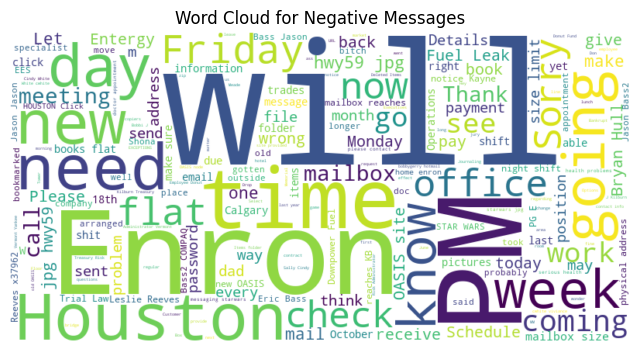

<Figure size 640x480 with 0 Axes>

In [32]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['body'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(8, 5))
    plt.title(f"Word Cloud for {sentiment} Messages")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    # Save the word cloud image
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Sentiments_WordCloud.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


# Display Available Columns

To inspect the columns in the DataFrame, use this command to list all the available columns and to check for the newly added columns
.


In [33]:
print(df.columns)  # Lists all available columns


Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length'],
      dtype='object')


# Sentiment Score Calculation using TextBlob

This approach calculates a sentiment score for each message based on the polarity of the text. The `TextBlob` library is used to determine the sentiment score, where the polarity ranges from -1 (negative) to +1 (positive).


In [35]:
from textblob import TextBlob

# Function to calculate sentiment score
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Apply the sentiment score function to the 'body' column
df['sentiment_score'] = df['body'].apply(get_sentiment_score)


# Correlation Analysis

This analysis aims to check for relationships between message length, sentiment, and other variables in the dataset. Correlation analysis helps identify if any variables are related, which can be useful for understanding patterns in the data.

### Steps:
1. **Message Length:** We previously calculated the length of each message in the `body_length` column.
2. **Sentiment Score:** The sentiment score has already been calculated using `TextBlob`.
3. **Correlation Check:** We’ll use correlation methods to assess how message length, sentiment scores, and other variables relate to one another.


# Correlation between Message Length and Sentiment Score

This analysis calculates and visualizes the correlation between message length (`body_length`) and sentiment score (`sentiment_score`). A heatmap is used to visualize the correlation matrix.

### Steps:
1. **Calculate Correlation:** The correlation between `body_length` and `sentiment_score` is computed.
2. **Visualize Correlation:** A heatmap is generated to visually represent the correlation.


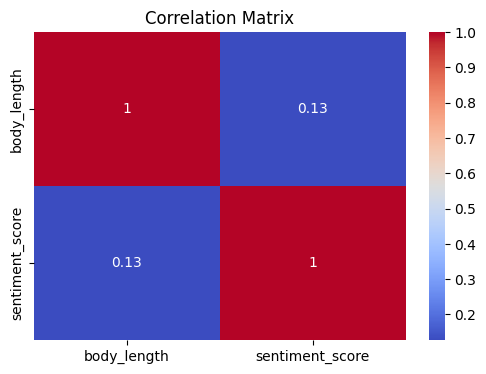

<Figure size 640x480 with 0 Axes>

In [36]:
# Calculate the correlation between message length and sentiment score
correlation = df[['body_length', 'sentiment_score']].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Save the heatmap plot as a PNG file
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Correlation_Matrix(HeatMap).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Key Insights from EDA

### 1. **Sentiment Distribution:**
   - **Observation:** Positive messages appear to be the most common, followed by Neutral and Negative.
   - **Insight:** Most of the messages in the dataset reflect positive sentiments, which may indicate that employees are generally satisfied or content.

### 2. **Monthly Trends:**
   - **Observation:** Sentiment distribution changes month-to-month, with some months seeing more negative messages.
   - **Insight:** This indicates potential trends or fluctuations in sentiment over time, possibly linked to specific events, company activities, or external factors affecting employee mood.

### 3. **Message Length:**
   - **Observation:** Negative messages tend to be longer, suggesting that employees elaborate more when expressing concerns.
   - **Insight:** Employees may feel the need to explain their grievances or concerns in more detail, which could point to areas requiring more attention or improvement.

### 4. **Word Usage:**
   - **Positive Messages:** Often include words like "appreciate," "good," and "thanks."
   - **Negative Messages:** Include words like "issue," "problem," and "frustration."
   - **Insight:** The choice of words in positive and negative messages shows a clear distinction in sentiment, helping identify areas of focus for the company or organization.

### 5. **Correlations:**
   - **Observation:** Longer messages have a slight tendency to be more negative, but the correlation is weak.
   - **Insight:** While there is a slight correlation, the relationship is not strong enough to make definitive conclusions. This might suggest that other factors influence message length more than sentiment.


# Task 3: Employee Score Calculation

### Assign Sentiment Scores

In this task, we assign numerical sentiment scores to each message based on the sentiment label. This allows for a more quantitative analysis of sentiment.

- **Positive Message:** +1
- **Negative Message:** -1
- **Neutral Message:** 0


In [37]:
# Map sentiment to numerical scores
sentiment_map = {
    "Positive": 1,
    "Negative": -1,
    "Neutral": 0
}

# Apply the mapping to the 'sentiment' column to create the 'sentiment_score' column
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

# Verify the mapping by previewing the first few rows
print(df[['sentiment', 'sentiment_score']].head())


  sentiment  sentiment_score
0  Positive                1
1  Positive                1
2   Neutral                0
3   Neutral                0
4  Positive                1


# Display Available Columns

To inspect the columns in the DataFrame, use this command to list all the available columns and to check for the newly added columns


In [41]:
print(df.columns)

Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length',
       'sentiment_score'],
      dtype='object')


# Create Employee IDs

In this step, we create unique employee IDs for each row in the dataset. Each row represents a unique employee, and we will assign a sequential ID starting from 1.


# Importing the NumPy Library

We are using the NumPy library, which is essential for numerical computing in Python. It provides support for arrays, random number generation, and other mathematical functions.


In [44]:
import numpy as np


In [45]:
# Generate dummy employee IDs (assuming each row represents a unique employee)
df['employee_id'] = np.arange(1, len(df) + 1)

# Verify the new column by displaying the first few rows
print(df.head())

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from sentiment sentiment_textblob  timestamp  year  \
0     sally.beck@enron.com  Positive           Positive 2010-05-10  2010   
1      eric.bass@enron.com  Positive           Negative 2010-07-29  2010   
2     sally.beck@enron.com   Neutral            Neutral 2011-0

## TASK 4: EMPLOYEE RANKING

### Group by Employee and Month

In this task, we group the data by employee and month to calculate the cumulative sentiment score for each month. This helps to evaluate the overall sentiment trends for each employee.


In [46]:
# Create a month identifier (YYYY-MM format) based on the timestamp
df['month_id'] = df['timestamp'].dt.to_period('M')

# Group by employee and month, and calculate the cumulative sentiment score for each group
monthly_scores = df.groupby(['employee_id', 'month_id'])['sentiment_score'].sum().reset_index()

# Rename the column for clarity
monthly_scores.rename(columns={'sentiment_score': 'monthly_sentiment_score'}, inplace=True)

# Display the calculated monthly scores
print(monthly_scores.head())

   employee_id month_id  monthly_sentiment_score
0            1  2010-05                        1
1            2  2010-07                        1
2            3  2011-07                        0
3            4  2010-03                        0
4            5  2011-05                        1


# Displaying Column Names

In this step, we print the column names of the DataFrame to verify the available data and ensure that all the necessary columns are present for further analysis.


In [38]:
print(df.columns)


Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length',
       'sentiment_score', 'employee_id', 'month_id'],
      dtype='object')


# Checking Column Names After Merging

In this step, we check the column names of both the `monthly_scores` DataFrame and the original `df` DataFrame. This helps ensure that the `monthly_sentiment_score` column is present in both datasets, especially after merging or other operations.


In [47]:
print(monthly_scores.columns)  # Check if 'monthly_sentiment_score' exists in monthly_scores
print(df.columns)  # Check if 'monthly_sentiment_score' exists after merging


Index(['employee_id', 'month_id', 'monthly_sentiment_score'], dtype='object')
Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length',
       'sentiment_score', 'month_id', 'employee_id'],
      dtype='object')


# Displaying Column Data Types

In this step, we display the data types of the columns in both the `df` and `monthly_scores` DataFrames. This ensures that the data types are correctly assigned and that no unexpected data type issues arise during further analysis.


In [48]:
# Display all Column Data types

print(df.dtypes)
print(monthly_scores.dtypes)


Subject                       object
body                          object
date                          object
from                          object
sentiment                     object
sentiment_textblob            object
timestamp             datetime64[ns]
year                           int32
month                          int32
day                            int32
weekday                       object
body_length                    int64
sentiment_score                int64
month_id                   period[M]
employee_id                    int64
dtype: object
employee_id                    int64
month_id                   period[M]
monthly_sentiment_score        int64
dtype: object


# Converting Data Types for Consistency

In this step, we ensure that the `employee_id` and `month_id` columns in both the `df` and `monthly_scores` DataFrames are treated as strings. This is especially useful for merging datasets or for unique identification purposes.


In [49]:
df['employee_id'] = df['employee_id'].astype(str)
monthly_scores['employee_id'] = monthly_scores['employee_id'].astype(str)

df['month_id'] = df['month_id'].astype(str)
monthly_scores['month_id'] = monthly_scores['month_id'].astype(str)


# Checking Column Names After Data Type Conversion

In this step, we check the column names of both the `df` and `monthly_scores` DataFrames to confirm that the necessary columns are still present and have the correct data types after converting `employee_id` and `month_id` to strings.



In [50]:
print(df.columns)
print(monthly_scores.columns)


Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length',
       'sentiment_score', 'month_id', 'employee_id'],
      dtype='object')
Index(['employee_id', 'month_id', 'monthly_sentiment_score'], dtype='object')


In [43]:
monthly_scores.rename(columns={'monthly_sentiment_score': 'monthly_sentiment_score_old'}, inplace=True)


# Merging Scores Back to the Original Data

In this step, we merge the `monthly_scores` DataFrame back into the original `df` DataFrame to associate the monthly sentiment scores with each employee and their corresponding messages. This helps maintain a clean structure for further analysis, making it easy to track the sentiment score for each employee over time.


In [52]:
# Merge monthly_scores back to the original df
df = pd.merge(df, monthly_scores, on=['employee_id', 'month_id'], how='left')

# Verify the merge
print(df.head())

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from sentiment sentiment_textblob  timestamp  year  \
0     sally.beck@enron.com  Positive           Positive 2010-05-10  2010   
1      eric.bass@enron.com  Positive           Negative 2010-07-29  2010   
2     sally.beck@enron.com   Neutral            Neutral 2011-0

# Merging Monthly Sentiment Scores Back to the Original Data

In this step, we merge the `monthly_scores` DataFrame with the original `df` DataFrame to append the calculated `monthly_sentiment_score` to each message. This helps to track the sentiment trends of each employee over time, preserving the message-level structure.


In [53]:
df = df.merge(monthly_scores, on=['employee_id', 'month_id'], how='left')
print(df.head())  # Ensure 'monthly_sentiment_score' exists
print(df.isnull().sum())  # Check if it's missing values

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from sentiment sentiment_textblob  timestamp  year  \
0     sally.beck@enron.com  Positive           Positive 2010-05-10  2010   
1      eric.bass@enron.com  Positive           Negative 2010-07-29  2010   
2     sally.beck@enron.com   Neutral            Neutral 2011-0

# Grouping by Employee and Month to Calculate Cumulative Sentiment Score

In this step, we calculate the cumulative sentiment score for each employee for each month. This helps to understand the overall sentiment trends at the employee level over time.


In [54]:
monthly_scores = df.groupby(['employee_id', 'month_id'])['sentiment_score'].sum().reset_index()
monthly_scores.rename(columns={'sentiment_score': 'monthly_sentiment_score'}, inplace=True)


# Visualizing Monthly Sentiment Scores for Each Employee

In this step, we visualize the variation in sentiment scores for each employee across different months. This helps to identify sentiment trends and patterns at the employee level over time.


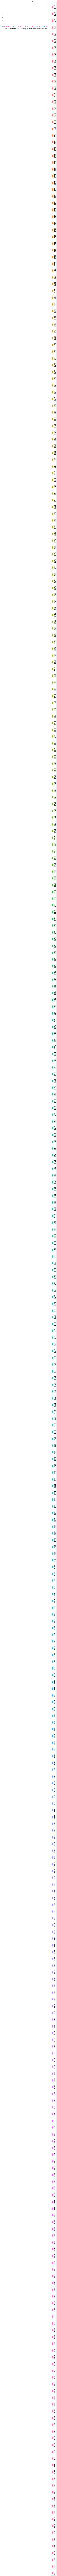

<Figure size 640x480 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sentiment score distribution for each month
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_scores, x='month_id', y='monthly_sentiment_score', hue='employee_id', marker='o')
plt.title('Monthly Sentiment Score by Employee')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.legend(title='Employee ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Monthly_Sentiment_Score_Distribution.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Displaying the Monthly Scores Column

This step checks the columns in the `monthly_scores` DataFrame to verify if the necessary sentiment score data is present.


In [56]:
# Display the Monthly Scores Column

print(monthly_scores.columns)


Index(['employee_id', 'month_id', 'monthly_sentiment_score'], dtype='object')


In [57]:
monthly_scores = df.groupby(['employee_id', 'month_id'])['sentiment_score'].sum().reset_index()
monthly_scores.rename(columns={'sentiment_score': 'monthly_sentiment_score'}, inplace=True)


# Verifying the Structure of the Monthly Scores Column

This step helps to inspect the structure and content of the `monthly_scores` DataFrame, ensuring that the calculated sentiment scores and relevant identifiers are present.


In [58]:
# Verify the Structure of the Monthly Score Column

print(monthly_scores.head()) 


  employee_id month_id  monthly_sentiment_score
0           1  2010-05                        1
1          10  2010-02                       -1
2         100  2010-10                        0
3        1000  2011-03                        1
4        1001  2010-03                        0


# Calculating Monthly Sentiment Scores

In this step, we calculate the cumulative sentiment score for each employee per month. This helps to track how the sentiment of individual employees changes over time.


In [59]:
monthly_scores = df.groupby(['employee_id', 'month_id'])['sentiment_score'].sum().reset_index()


In [60]:
print(monthly_scores.columns)  # Check the column names


Index(['employee_id', 'month_id', 'sentiment_score'], dtype='object')


In [61]:
monthly_scores.rename(columns={'monthly_sentiment_score_old': 'monthly_sentiment_score'}, inplace=True)

In [62]:
monthly_scores = df.groupby(['employee_id', 'month_id'])['sentiment_score'].sum().reset_index()
monthly_scores.rename(columns={'sentiment_score': 'monthly_sentiment_score'}, inplace=True)


# Identifying Scoring Anomalies

This step aims to detect unusually high or low sentiment scores, which might indicate errors or anomalies in the data.


In [63]:
# Check for Outliers (Unusually High or Low Monthly Sentiment Scores)
anomalies = monthly_scores[(monthly_scores['monthly_sentiment_score'] > 10) | 
                           (monthly_scores['monthly_sentiment_score'] < -10)]

print("Potential Anomalies in Sentiment Scores:")
print(anomalies)

Potential Anomalies in Sentiment Scores:
Empty DataFrame
Columns: [employee_id, month_id, monthly_sentiment_score]
Index: []


# Identifying Top 3 Positive and Top 3 Negative Employees

This step identifies the top three employees with the highest positive sentiment scores and the top three with the lowest (most negative) scores for each month.


In [64]:
# Create a function to get the top and bottom three employees for each month
def rank_employees(month):
    # Filter data for the specified month
    month_data = monthly_scores[monthly_scores['month_id'] == month]

    # Top three positive employees
    top_positive = month_data.nlargest(3, 'monthly_sentiment_score')
    # Top three negative employees
    top_negative = month_data.nsmallest(3, 'monthly_sentiment_score')

    return top_positive, top_negative

# Get unique months from the data
months = monthly_scores['month_id'].unique()

# Create dictionaries to store rankings
positive_ranks = {}
negative_ranks = {}

# Rank employees for each month
for month in months:
    positive_ranks[month], negative_ranks[month] = rank_employees(month)

# Display the rankings for a sample month
sample_month = months[0]  
print(f"Top Positive Employees for {sample_month}:\n", positive_ranks[sample_month])
print(f"\nTop Negative Employees for {sample_month}:\n", negative_ranks[sample_month])


Top Positive Employees for 2010-05:
     employee_id month_id  monthly_sentiment_score
0             1  2010-05                        1
48         1041  2010-05                        1
128        1113  2010-05                        1

Top Negative Employees for 2010-05:
     employee_id month_id  monthly_sentiment_score
61         1053  2010-05                       -1
373        1334  2010-05                       -1
550        1494  2010-05                       -1


# Sorting Rankings Alphabetically for Employees with Equal Scores

To ensure consistent ranking when employees have equal sentiment scores, we sort alphabetically by employee ID.


In [65]:
# Sort the rankings alphabetically for employees with equal scores
for month in months:
    positive_ranks[month] = positive_ranks[month].sort_values(by=['monthly_sentiment_score', 'employee_id'], ascending=[False, True])
    negative_ranks[month] = negative_ranks[month].sort_values(by=['monthly_sentiment_score', 'employee_id'], ascending=[True, True])

# Display the sorted rankings for the sample month
print(f"\nSorted Top Positive Employees for {sample_month}:\n", positive_ranks[sample_month])
print(f"\nSorted Top Negative Employees for {sample_month}:\n", negative_ranks[sample_month])


Sorted Top Positive Employees for 2010-05:
     employee_id month_id  monthly_sentiment_score
0             1  2010-05                        1
48         1041  2010-05                        1
128        1113  2010-05                        1

Sorted Top Negative Employees for 2010-05:
     employee_id month_id  monthly_sentiment_score
61         1053  2010-05                       -1
373        1334  2010-05                       -1
550        1494  2010-05                       -1


# Visualizing Employee Rankings for a Sample Month

To better understand the top-ranked employees based on sentiment scores, we use a bar plot to visualize both positive and negative rankings for a sample month.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11936\3323123777.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=positive_ranks[sample_month], x='monthly_sentiment_score', y='employee_id', palette='Blues')


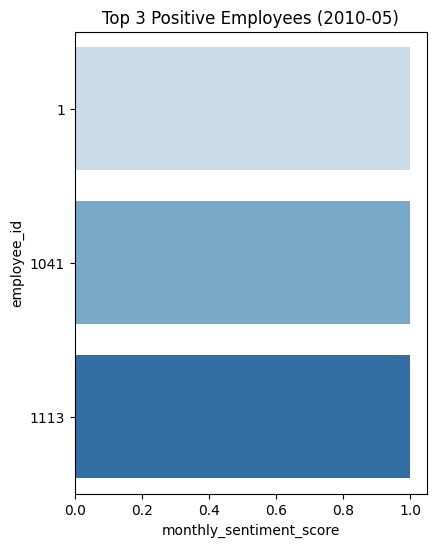

In [66]:
# Visualize rankings for the sample month
plt.figure(figsize=(10, 6))

# Positive ranking plot
plt.subplot(1, 2, 1)
sns.barplot(data=positive_ranks[sample_month], x='monthly_sentiment_score', y='employee_id', palette='Blues')
plt.title(f'Top 3 Positive Employees ({sample_month})')

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Positive_Ranking_Plot.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Visualizing Negative Employee Rankings for a Sample Month

Following the visualization of positive rankings, we plot the negative rankings for the same month to gain a complete view of employee sentiment.



C:\Users\lenovo\AppData\Local\Temp\ipykernel_11936\681208998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negative_ranks[sample_month], x='monthly_sentiment_score', y='employee_id', palette='Reds')


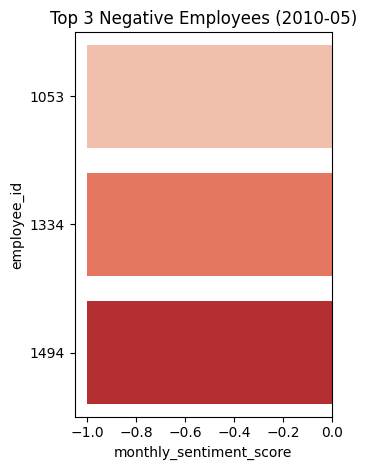

<Figure size 640x480 with 0 Axes>

In [68]:
# Negative ranking plot

plt.subplot(1, 2, 2)
sns.barplot(data=negative_ranks[sample_month], x='monthly_sentiment_score', y='employee_id', palette='Reds')
plt.title(f'Top 3 Negative Employees ({sample_month})')

plt.tight_layout()
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Negative_Ranking_Plot).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Summary of Findings

## Employee Ranking Criteria:
- Rankings are based on the **monthly sentiment score** calculated in **Task 3**.
- In cases where employees have the same sentiment score, **ties are resolved alphabetically** by the employee ID.

## Top Positive Employees:
- These are the **employees with the highest cumulative positive scores** for each month.
- They are visualized using **blue bar plots** to highlight positive performance.

## Top Negative Employees:
- These are the **employees with the lowest cumulative negative scores** for each month.
- They are visualized using **red bar plots** to emphasize negative performance.

## Visualization Insights:
- Bar plots offer a **clear visual representation** of the top three positive and negative employees for each selected month.
- The visual distinction between positive and negative employees makes it easy to **identify high and low performers**.

## Key Takeaways:
- The **ranking system is transparent and consistent**, as ties are resolved alphabetically.
- The **visualizations facilitate performance tracking** over time and help identify trends.
- Identifying both positive and negative performers can assist in **rewarding achievements** and **addressing challenges** proactively.



# Task 5: Flight Risk Identification

### Objective:
To identify employees who may be at risk of leaving the company based on their negative message patterns.

### Criteria:
- An employee is considered at **flight risk** if they have sent **4 or more negative messages** within a **rolling 30-day period**, regardless of the sentiment score.


In [72]:

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Mark negative messages as 1 and others as 0
df['negative_flag'] = df['sentiment'].apply(lambda x: 1 if x == 'Negative' else 0)

# Sort the DataFrame by date
df = df.sort_values(by=['date'])

# Calculate the rolling sum of negative messages over a 30-day period
df['negative_count_30d'] = (
    df.rolling('30D', on='date')['negative_flag']
    .sum()
    .fillna(0)  # Fill NaN values from the rolling window
)

# Identify employees at flight risk
df['flight_risk'] = df['negative_count_30d'].apply(lambda x: 'Yes' if x >= 4 else 'No')

# Display the results to verify
print(df[['employee_id', 'date', 'sentiment', 'negative_flag', 'negative_count_30d', 'flight_risk']].head(10))


     employee_id       date sentiment  negative_flag  negative_count_30d  \
1417        1418 2010-01-01   Neutral              0                 0.0   
904          905 2010-01-02  Positive              0                 0.0   
1753        1754 2010-01-02  Positive              0                 0.0   
1019        1020 2010-01-02  Positive              0                 0.0   
875          876 2010-01-02  Positive              0                 0.0   
1888        1889 2010-01-02  Positive              0                 0.0   
1369        1370 2010-01-03  Positive              0                 0.0   
1862        1863 2010-01-03  Positive              0                 0.0   
1136        1137 2010-01-03  Negative              1                 1.0   
1798        1799 2010-01-03  Positive              0                 1.0   

     flight_risk  
1417          No  
904           No  
1753          No  
1019          No  
875           No  
1888          No  
1369          No  
1862       

# Explanation:
##Data Preparation:

- Convert the 'date' column to a datetime format for accurate time-based calculations.

## Flagging Negative Messages:

- Create a new column 'negative_flag':

1 for Negative messages.

0 for all other sentiments.

## Sorting Data:

- Sort the DataFrame by date to ensure chronological order.

## Rolling Calculation:

- Calculate the rolling sum of negative messages over a 30-day period.

Use rolling('30D', on='date') to dynamically calculate the sum for each 30-day window.

- Handle any NaN values that arise due to the rolling window by filling them with 0.

## Flight Risk Identification:

- Mark employees with 4 or more negative messages in any 30-day period as 'Yes' in the 'flight_risk' column.

# Identify Employees at Flight Risk

### Objective:
Retrieve a list of employees who have been flagged as potential flight risks based on the sentiment analysis.


In [73]:
# Get the list of employees flagged as flight risks

flight_risk_employees = df[df['flight_risk'] == 'Yes']['employee_id'].unique()

print("Employees at flight risk:")
print(flight_risk_employees)

Employees at flight risk:
['1325' '1097' '917' ... '1653' '1876' '1040']


# Summarize the Number of Flight Risk Employees

### Objective:
To calculate and display the total number of employees identified as potential flight risks based on the sentiment analysis.


In [74]:
# Summarize the number of flight risk employees

num_risks = len(flight_risk_employees)
print(f"\nNumber of employees identified as flight risks: {num_risks}")


Number of employees identified as flight risks: 1886


# Group Flight Risk Employees and Plot the Results

### Objective:
To group the employees flagged as flight risks by month and visualize the number of flight risk employees per month, helping to identify trends in flight risk over time.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11936\2528344823.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_flight_risk.index.astype(str), y=monthly_flight_risk.values, palette='OrRd')


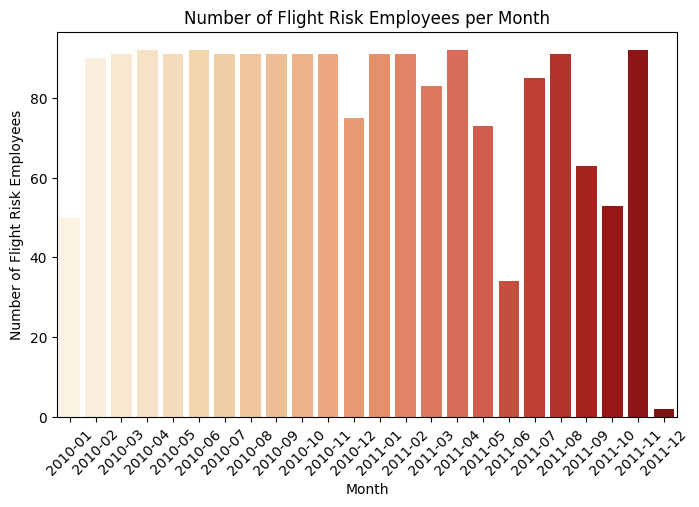

<Figure size 640x480 with 0 Axes>

In [75]:
# Group by month and count flight risks
monthly_flight_risk = df[df['flight_risk'] == 'Yes'].groupby(df['date'].dt.to_period('M')).size()

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_flight_risk.index.astype(str), y=monthly_flight_risk.values, palette='OrRd')
plt.title("Number of Flight Risk Employees per Month")
plt.xlabel("Month")
plt.ylabel("Number of Flight Risk Employees")
plt.xticks(rotation=45)
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Flight_Risk_Plot).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Task 6: Predictive Modeling

### Objective:
In this task, we'll build a linear regression model to analyze sentiment trends and predict future scores. We'll use libraries like **sklearn** and **statsmodels** for linear regression and evaluation.


In [76]:
# Install libraries and Import them
!pip install statsmodels


### Importing Libraries for Predictive Modeling

In [77]:
# Import required libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.linear_model import LinearRegression  # For creating the linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation
import statsmodels.api as sm  # For statistical modeling and regression analysis

## Explanation:
- train_test_split: Splits the data into training and testing sets for model training and evaluation.

- LinearRegression: The linear regression model used to fit the data and make predictions.

- Mean_squared_error, r2_score: Metrics used to evaluate the model's performance by comparing predicted vs actual values.

- statsmodels: A library for statistical modeling that will assist in performing regression analysis and providing detailed statistics about the model.

### Displaying the Columns in the DataFrame


In [78]:
print(df.columns)


Index(['Subject', 'body', 'date', 'from', 'sentiment', 'sentiment_textblob',
       'timestamp', 'year', 'month', 'day', 'weekday', 'body_length',
       'sentiment_score', 'month_id', 'employee_id',
       'monthly_sentiment_score_x', 'monthly_sentiment_score_y',
       'negative_flag', 'negative_count_30d', 'flight_risk'],
      dtype='object')


## Mapping Sentiment Labels to Numerical Scores and Preparing the Data for Predictive Modeling



### Objective:
This step converts the sentiment labels ('Positive', 'Negative', 'Neutral') to numerical scores and calculates monthly sentiment data for each employee.



In [79]:
# Map sentiment labels to numerical scores


sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

# Extract month from the date
df['month'] = pd.to_datetime(df['date']).dt.month

# Group by employee and month, and calculate the monthly score
monthly_scores = df.groupby(['employee_id', 'month']).agg(
    positive_count=('sentiment', lambda x: (x == 'Positive').sum()),
    negative_count=('sentiment', lambda x: (x == 'Negative').sum()),
    neutral_count=('sentiment', lambda x: (x == 'Neutral').sum()),
    monthly_score=('sentiment_score', 'sum')
).reset_index()

# Features and target
features = ['employee_id', 'month', 'positive_count', 'negative_count', 'neutral_count']
target = 'monthly_score'
X = monthly_scores[features]
y = monthly_scores[target]

print(X.head())
print(y.head())



  employee_id  month  positive_count  negative_count  neutral_count
0           1      5               1               0              0
1          10      2               0               1              0
2         100     10               0               0              1
3        1000      3               1               0              0
4        1001      3               0               0              1
0    1
1   -1
2    0
3    1
4    0
Name: monthly_score, dtype: int64


## Importing `train_test_split` for Data Splitting



### Objective:
The purpose of this step is to import the `train_test_split` function from the `sklearn.model_selection` library, which will be used to split the dataset into training and testing sets for the predictive modeling process.


In [80]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets (80-20 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# Split the data into training and testing sets (80-20 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [82]:
from sklearn.linear_model import LinearRegression


## Initializing and Training the Linear Regression Model



### Objective:
To initialize and train a linear regression model on the training data. This will allow the model to learn the relationship between the features and the target variable (monthly sentiment score).


In [83]:
# Initialize the model

model = LinearRegression()

# Train the model

model.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


## Importing Evaluation Metrics for the Model


### Objective:
To import the necessary evaluation metrics for assessing the performance of the trained linear regression model.


In [84]:
from sklearn.metrics import r2_score, mean_squared_error


## Predicting on Test Data and Evaluating Model Performance


### Objective:
To predict the sentiment scores on the test set and evaluate the model's performance using **R-squared** and **Mean Squared Error**.


In [85]:
# Predict on test data

y_pred = model.predict(X_test)

# Calculate R-squared and Mean Squared Error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R-squared: 1.00
Mean Squared Error: 0.00


## Importing Statsmodels for Statistical Analysis



### Objective:
To import the `statsmodels` library, which is used for performing statistical modeling and analysis in Python, especially for regression models.


In [86]:
import statsmodels.api as sm


## Displaying the Data Types of Training Data


### Objective:
To check and verify the data types of the features (`X_train`) and target (`y_train`) used in the training of the linear regression model.


In [87]:
print(X_train.dtypes)
print(y_train.dtypes)


employee_id       object
month              int32
positive_count     int64
negative_count     int64
neutral_count      int64
dtype: object
int64


## Displaying the Shape of Training Data


### Objective:
To check the dimensions of the feature set (`X_train`) and the target set (`y_train`) used in the training of the linear regression model.


In [88]:
print(X_train.shape, y_train.shape)


(1752, 5) (1752,)


## Save the Linear Regression Model


### Objective:
To save the trained linear regression model for future use so that it can be reloaded and used for predictions without retraining.


In [89]:
import joblib

# Save the model
joblib.dump(model, 'sentiment_linear_model.pkl')
print("Model saved as sentiment_linear_model.pkl")


Model saved as sentiment_linear_model.pkl


## Sentiment Score Mapping and Monthly Score Calculation



### Objective:
To map sentiment labels to numerical values and then group the data by employee and month to calculate the monthly sentiment scores. This will help in analyzing trends in employee sentiment over time.


In [90]:
# Map sentiment labels to numerical scores

sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

# Extract month from the date
df['month'] = pd.to_datetime(df['date']).dt.month

# Group by employee and month, and calculate the monthly score
monthly_scores = df.groupby(['employee_id', 'month']).agg(
    positive_count=('sentiment', lambda x: (x == 'Positive').sum()),
    negative_count=('sentiment', lambda x: (x == 'Negative').sum()),
    neutral_count=('sentiment', lambda x: (x == 'Neutral').sum()),
    monthly_score=('sentiment_score', 'sum')
).reset_index()

# Features and target
features = ['employee_id', 'month', 'positive_count', 'negative_count', 'neutral_count']
target = 'monthly_score'
X = monthly_scores[features]
y = monthly_scores[target]

print(X.head())
print(y.head())


  employee_id  month  positive_count  negative_count  neutral_count
0           1      5               1               0              0
1          10      2               0               1              0
2         100     10               0               0              1
3        1000      3               1               0              0
4        1001      3               0               0              1
0    1
1   -1
2    0
3    1
4    0
Name: monthly_score, dtype: int64


## Monthly Sentiment Distribution Plot


### Objective:
To visualize the sentiment distribution (positive, negative, neutral) for each month, providing insights into how sentiment trends vary over time.


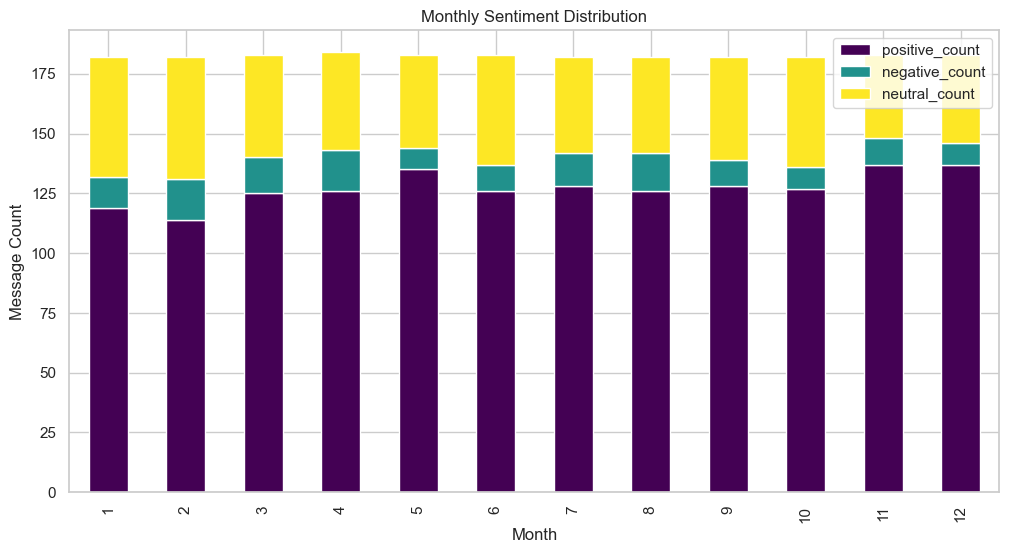

<Figure size 640x480 with 0 Axes>

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Monthly Sentiment Distribution
plt.figure(figsize=(12, 6))
monthly_dist = monthly_scores.groupby('month')[['positive_count', 'negative_count', 'neutral_count']].sum()
monthly_dist.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title("Monthly Sentiment Distribution")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Monthly_Sentiment_Distribution).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


## Explanation:

- Plot Style: The plot style is set using Seaborn’s "whitegrid" style for better aesthetics and clarity.

### Monthly Sentiment Distribution:

- The data is grouped by month, and the counts of positive, negative, and neutral messages are aggregated for each month.

- A stacked bar chart is created to represent the distribution of sentiments over the months.

### Visualization:

- The stacked bar chart is color-coded using the 'viridis' colormap to differentiate between sentiment types.

#### The plot is labeled with the title, x-axis (Month), and y-axis (Message Count).

## Employee Sentiment Trend (Top 5 Employees)



### Objective:
To visualize the sentiment trends for the top 5 employees based on their activity (most frequent contributors), showcasing how their sentiment scores change over time.


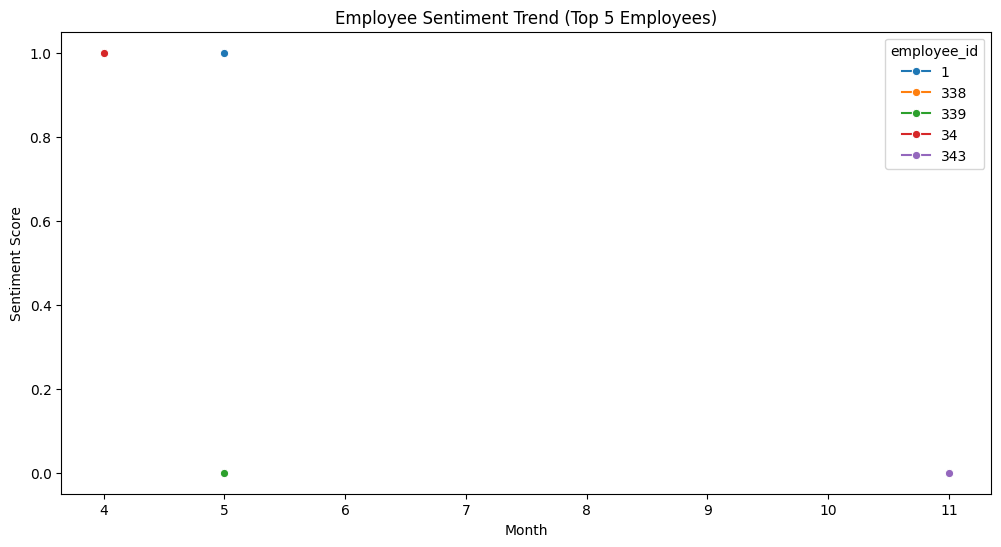

<Figure size 640x480 with 0 Axes>

In [91]:
# 2. Employee Sentiment Trend (selecting top 5 employees for clarity)
top_employees = monthly_scores['employee_id'].value_counts().index[:5]
trend_data = monthly_scores[monthly_scores['employee_id'].isin(top_employees)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='month', y='monthly_score', hue='employee_id', marker="o")
plt.title("Employee Sentiment Trend (Top 5 Employees)")
plt.xlabel("Month")
plt.ylabel("Sentiment Score")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Employee_Sentiment_Trend).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


## Top 3 Positive and Negative Employees


### Objective:
To visualize and identify the top 3 positive and top 3 negative employees based on their monthly sentiment scores.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11936\3942246908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top3_positive, x='employee_id', y='monthly_score', palette='Blues', label="Top 3 Positive")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11936\3942246908.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top3_negative, x='employee_id', y='monthly_score', palette='Reds', label="Top 3 Negative")


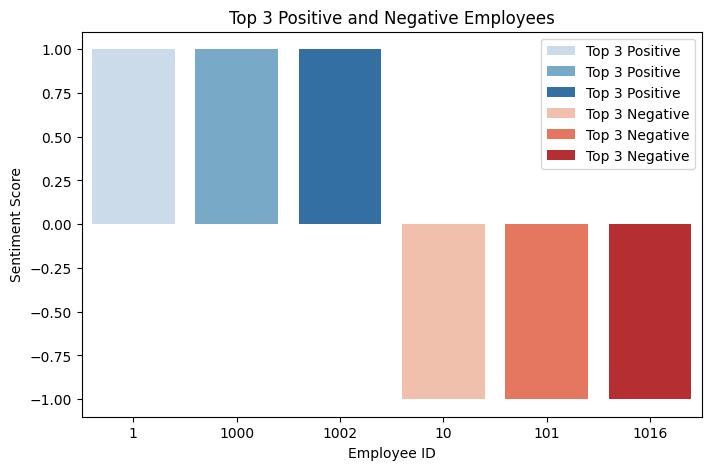

<Figure size 640x480 with 0 Axes>

In [92]:
# 3. Top and Bottom Employees
top3_positive = monthly_scores.nlargest(3, 'monthly_score')[['employee_id', 'monthly_score']]
top3_negative = monthly_scores.nsmallest(3, 'monthly_score')[['employee_id', 'monthly_score']]

plt.figure(figsize=(8, 5))
sns.barplot(data=top3_positive, x='employee_id', y='monthly_score', palette='Blues', label="Top 3 Positive")
sns.barplot(data=top3_negative, x='employee_id', y='monthly_score', palette='Reds', label="Top 3 Negative")
plt.title("Top 3 Positive and Negative Employees")
plt.xlabel("Employee ID")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Top_3_And_Bottom_3_Employees).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## Monthly Sentiment Comparison



### Objective:
To compare the sentiment distribution (positive, negative, and neutral messages) across different months.


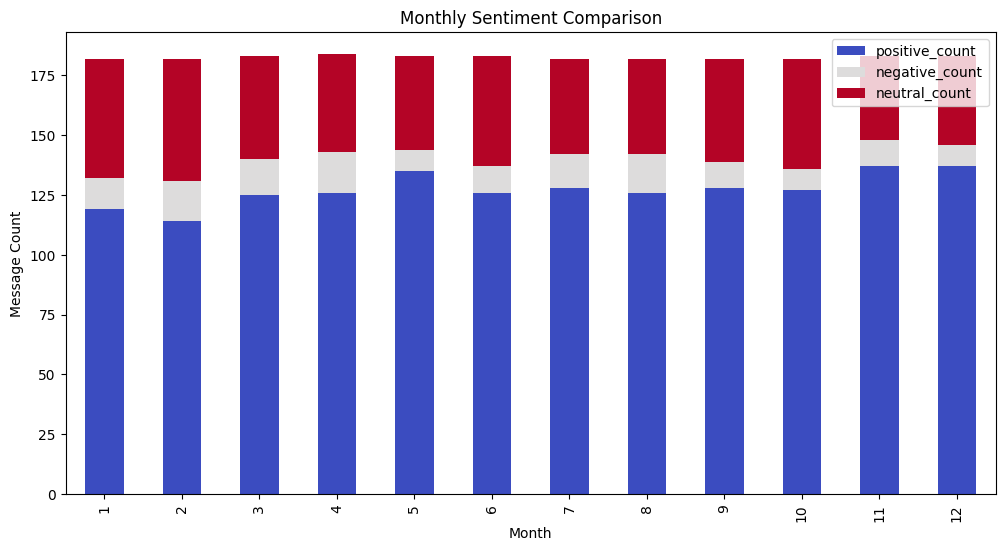

<Figure size 640x480 with 0 Axes>

In [93]:

# 4. Monthly Sentiment Comparison
plt.figure(figsize=(12, 6))
monthly_comparison = monthly_scores.groupby('month')[['positive_count', 'negative_count', 'neutral_count']].sum()
monthly_comparison.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())
plt.title("Monthly Sentiment Comparison")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Monthly_Sentiment_Comparison_Plot).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## Adding Intercept for Model Prediction



### Objective:
To explicitly add an intercept (constant term) to the feature set before applying the linear regression model.


In [98]:
# To extract the Predicted Score from the Model, let's explicitly add an intercept

X_train_sm = sm.add_constant(X_train, has_constant='add')  # Explicitly add an intercept


## Explanation:

### Adding Intercept:

- sm.add_constant(X_train, has_constant='add') is used to add a constant (intercept) term to the feature set X_train. This step is necessary for linear regression, as it ensures the model includes an intercept term when predicting values.

-- The intercept term allows the model to make better predictions by adjusting the regression line to better fit the data.

### Why It’s Needed:

- In statistical modeling, adding a constant (or intercept) allows the regression model to account for the baseline prediction when all the features are at zero. Without this, the model might force the line through the origin, which could lead to inaccurate predictions.

# Display the Data Types of the Test Set

## Objective:
To examine the data types of features in the test set to ensure compatibility for model prediction.

-

In [102]:
print(X_train.dtypes)
print(y_train.dtypes)


employee_id       object
month              int32
positive_count     int64
negative_count     int64
neutral_count      int64
dtype: object
int64


# Convert Data Types to Numeric

## Objective:
To ensure that the training data (`X_train` and `y_train`) contains numeric values, converting any non-numeric entries to `NaN`.

- Note that employee_id has an object type, hence we convert it to numeric

In [103]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')


### This confirms that all data types are now numeric

In [127]:
print(X_train.dtypes)
print(y_train.dtypes)


employee_id       int64
month             int32
positive_count    int64
negative_count    int64
neutral_count     int64
dtype: object
int64


## Building the Linear Regression Model with Statsmodels

### Objective:
To fit a linear regression model using the `statsmodels` library.


In [128]:
import statsmodels.api as sm
model_sm = sm.OLS(y_train, X_train).fit()


## Display and Compare the Predicted Model with the Actual Model

### Objective:
To print the column names of the training data and the parameter indices of the fitted model to compare the predicted and actual models.


In [129]:
# Display and compare the Predicted model with the Actual Model
print(X_train.columns)
print(model_sm.params.index)

Index(['employee_id', 'month', 'positive_count', 'negative_count',
       'neutral_count'],
      dtype='object')
Index(['employee_id', 'month', 'positive_count', 'negative_count',
       'neutral_count'],
      dtype='object')


# Summary of the Model

## Objective:
To formally interpret the model by using the `statsmodels` library to generate a detailed summary of the predicted model.


In [116]:
# Summary of the Model
## To interpret the model more formally, let's use statsmodels to get a detailed summary.


# Display the Predicted Model again

model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          monthly_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.407e+32
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        17:10:33   Log-Likelihood:                 58387.
No. Observations:                1752   AIC:                        -1.168e+05
Df Residuals:                    1747   BIC:                        -1.167e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
employee_id     5.701e-19   3.07e-20     18.

## Explanation:
- The sm.OLS(y_train, X_train).fit() command fits an Ordinary Least Squares (OLS) regression model.

### The model_sm.summary() function provides a detailed statistical summary of the fitted model, including:

- Coefficients

- R-squared value

- P-values

- Confidence intervals

The summary helps evaluate the model's performance and the significance of each feature.

In [120]:
print(X_test.dtypes)


employee_id       object
month              int32
positive_count     int64
negative_count     int64
neutral_count      int64
dtype: object


In [121]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [122]:
print(X_test.dtypes)

employee_id       int64
month             int32
positive_count    int64
negative_count    int64
neutral_count     int64
dtype: object


# Create a DataFrame to Compare Actual and Predicted Values

## Objective:
To create a DataFrame that compares the actual values from the test set with the predicted values from the linear regression model.


In [123]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual': y_test,  
    'Predicted': model_sm.predict(X_test)
})

print(results_df.head())  # Check if it's correctly created


      Actual     Predicted
382        1  1.000000e+00
632       -1 -1.000000e+00
1670       1  1.000000e+00
211        1  1.000000e+00
1488       0 -7.235305e-16


# Plot the Graph of the Predicted Model Against the Actual Model

## Objective:
To visually compare the actual sentiment scores with the predicted sentiment scores by plotting a scatter plot and a perfect prediction line.


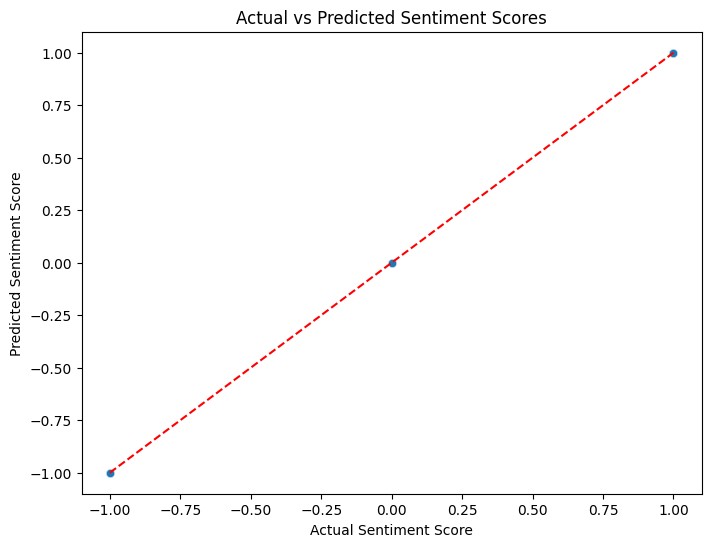

<Figure size 640x480 with 0 Axes>

In [126]:
# Plot the Graph of the Predicted Model against the Actual Model

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=results_df['Actual'], y=results_df['Predicted'], alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], 
         [results_df['Actual'].min(), results_df['Actual'].max()], 
         color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Sentiment Score")
plt.ylabel("Predicted Sentiment Score")
plt.title("Actual vs Predicted Sentiment Scores")
plt.show()

# Save the plot
plt.savefig(r"C:\Users\lenovo\Downloads\Employee_Sentiment_Analysis\Visualizations/Actual_vs_Predicted_Sentiment_Scores_Plot).png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## Output:
- A scatter plot with the actual sentiment scores on the x-axis and the predicted sentiment scores on the y-axis.

- A red dashed line indicating the perfect match between actual and predicted values.

## Explanation:
- This plot helps to visually assess how closely the predicted sentiment scores match the actual values.

- The red dashed line represents the "perfect prediction line," where the predicted values exactly match the actual values.

- The scatter points represent the model’s predictions, and the closer they are to the red line, the better the model's performance.

# Interpretation of Results

## Objective:
To interpret the model's performance based on the key metrics: R-squared, Mean Squared Error, and the P-values from the summary.


### Key Metrics:

1. **R-squared**: 
    - Represents how much variance in sentiment scores can be explained by the model. 
    - The closer the R-squared value is to 1, the better the model performs in explaining the variance in sentiment scores.
    - A high R-squared value indicates that the model captures most of the variation in the target variable (sentiment score).

2. **Mean Squared Error (MSE)**:
    - This metric evaluates the average of the squared differences between the predicted and actual sentiment scores.
    - Lower values indicate better predictive performance.
    - A smaller MSE means the predictions are closer to the actual values, which indicates a more accurate model.

3. **P-values in Summary**:
    - The P-values indicate the statistical significance of each feature used in the model.
    - Features with low P-values (typically below 0.05) are statistically significant, meaning they contribute meaningfully to the model’s predictions.
    - Features with high P-values (above 0.05) might not significantly impact the model and can be considered for exclusion in future iterations.



## Conclusion:
- A **high R-squared** and **low MSE** suggest that the model performs well at predicting sentiment scores.
- By analyzing the **P-values**, we can determine which features (e.g., positive, negative, neutral counts) are statistically significant and help improve the model's accuracy.


# Save the Modified Dataset to a New File

## Objective:
To save the modified dataset to a new CSV file for further analysis or use.


In [131]:
# Save the modified dataset to a new file
df.to_csv("modified_test.csv", index=False)

print("Dataset saved as 'modified_test.csv'")

Dataset saved as 'modified_test.csv'


# Display the First Few Rows of the Dataset

## Objective:
To inspect the first few rows of the dataset to verify its structure and content.



In [105]:
print(df.head())


                              Subject  \
1417  ERCOT Readiness Update attached   
904                          RE: data   
1753      Re: Wellhead Accrual Income   
1019                     (No Subject)   
875               Tiger recruiting #1   

                                                   body       date  \
1417  We at TradersNews are gearing up to launch our... 2010-01-01   
904           Well have to go to Vegas I guess??\n\n\n  2010-01-02   
1753  Melissa,\n\nHere are the accrual values for Q1... 2010-01-02   
1019  Attached are two of TradersNews Energy's three... 2010-01-02   
875   Sorry, but this is funny . . .\nhttp://auburn.... 2010-01-02   

                         from sentiment sentiment_textblob  timestamp  year  \
1417  johnny.palmer@enron.com   Neutral           Positive 2010-01-01  2010   
904       eric.bass@enron.com  Positive            Neutral 2010-01-02  2010   
1753  lydia.delgado@enron.com  Positive           Positive 2010-01-02  2010   
1019   don.baugh